Collecting Dataset

In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [19]:
!kaggle datasets download -d lucassj/dogs-vs-cats-train-validadion-and-evaluation

 98% 1.05G/1.07G [00:12<00:00, 55.2MB/s]
100% 1.07G/1.07G [00:12<00:00, 89.4MB/s]


In [ ]:
!unzip *.zip && rm -rf *.zip

Loading Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [22]:
generator = ImageDataGenerator(
    rescale=1/255
)

train_generator = generator.flow_from_directory(
    "/content/data/train",
    target_size=(200, 200),
    batch_size=18,
    class_mode='categorical'
)

validation_generator = generator.flow_from_directory(
    "/content/data/validation",
    target_size=(200, 200),
    batch_size=18,
    class_mode='categorical'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Designing Model

In [23]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())

model.add(Dense(units=1000, activation=tf.nn.relu))
model.add(Dropout(rate=0.35))

model.add(Dense(2, activation=tf.nn.softmax))
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 64)       

Calculate Param:
```
param_number = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1)
```

In [16]:
# Creating Callback

class CatsVsDogsCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.15):
      print('\nAccuracy is high so cancelling training!')
      self.model.stop_training = True

In [25]:
# callback = CatsVsDogsCallback()
history_one = model.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1112/1112 [==============================] - 81s 72ms/step - loss: 0.6929 - accuracy: 0.5289 - val_loss: 0.6275 - val_accuracy: 0.6658
Epoch 2/20
1112/1112 [==============================] - 79s 71ms/step - loss: 0.5749 - accuracy: 0.7017 - val_loss: 0.4937 - val_accuracy: 0.7566
Epoch 3/20
1112/1112 [==============================] - 79s 71ms/step - loss: 0.4960 - accuracy: 0.7576 - val_loss: 0.4549 - val_accuracy: 0.7906
Epoch 4/20
1112/1112 [==============================] - 80s 72ms/step - loss: 0.4481 - accuracy: 0.7894 - val_loss: 0.4213 - val_accuracy: 0.7992
Epoch 5/20
1112/1112 [==============================] - 79s 71ms/step - loss: 0.3990 - accuracy: 0.8200 - val_loss: 0.3806 - val_accuracy: 0.8258
Epoch 6/20
1112/1112 [==============================] - 79s 71ms/step - loss: 0.3569 - accuracy: 0.8400 - val_loss: 0.3649 - val_accuracy: 0.8348
Epoch 7/20
1112/1112 [==============================] - 77s 69ms/step - loss: 0.3288 - accuracy: 0.8573 - val_loss: 0.3328 -

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
model.save('/content/drive/MyDrive/Models(AI)/cats_vs_dogs_v1.h5')

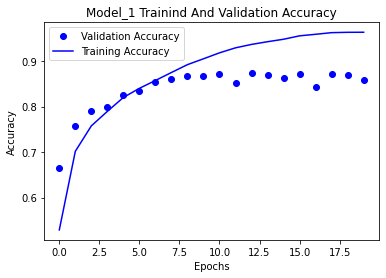

In [28]:
epochs_one = range(len(history_one.history['accuracy']))
plt.plot(epochs_one, history_one.history['val_accuracy'], 'bo', label = 'Validation Accuracy')
plt.plot(epochs_one, history_one.history['accuracy'], 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model_1 Trainind And Validation Accuracy")
plt.legend()

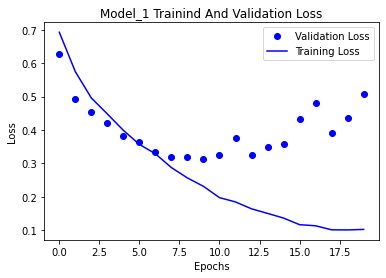

In [29]:
epochs_one = range(len(history_one.history['accuracy']))
plt.plot(epochs_one, history_one.history['val_loss'], 'bo', label = 'Validation Loss')
plt.plot(epochs_one, history_one.history['loss'], 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model_1 Trainind And Validation Loss")
plt.legend()

Using Augmentation Techniques

In [2]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/train",
    seed=123,
    image_size=(200, 200),
    batch_size=32
)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/validation",
    seed=123,
    image_size=(200, 200),
    batch_size=32
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
class_names = train_ds.class_names
num_classes =len(class_names)
print(class_names)

['cat', 'dog']


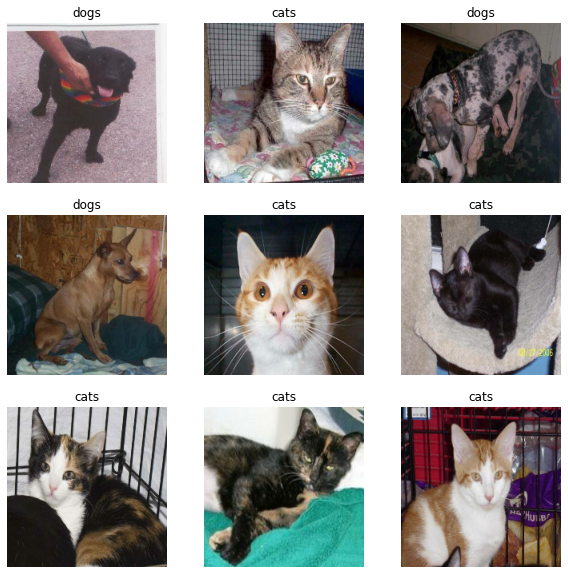

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [4]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(200, 
                                                              200,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

In [5]:
model = Sequential([
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/MyDrive/Models(AI)/cats_vs_dogs_v2.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose = 1)

earlystop = EarlyStopping(monitor="val_loss",
                         min_delta=0,
                         patience=3,
                         verbose=1,
                         restore_best_weights=True)

callbacks = [earlystop, checkpoint]

In [8]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs,
  callbacks=callbacks
)

Epoch 1/100
625/625 [==============================] - 56s 83ms/step - loss: 0.6237 - accuracy: 0.6482 - val_loss: 0.5206 - val_accuracy: 0.7406

Epoch 00001: val_loss improved from inf to 0.52063, saving model to /content/drive/MyDrive/Models(AI)/cats_vs_dogs_v2.h5
Epoch 2/100
625/625 [==============================] - 49s 79ms/step - loss: 0.5469 - accuracy: 0.7208 - val_loss: 0.4985 - val_accuracy: 0.7524

Epoch 00002: val_loss improved from 0.52063 to 0.49852, saving model to /content/drive/MyDrive/Models(AI)/cats_vs_dogs_v2.h5
Epoch 3/100
625/625 [==============================] - 49s 78ms/step - loss: 0.4925 - accuracy: 0.7605 - val_loss: 0.4373 - val_accuracy: 0.7912

Epoch 00003: val_loss improved from 0.49852 to 0.43731, saving model to /content/drive/MyDrive/Models(AI)/cats_vs_dogs_v2.h5
Epoch 4/100
625/625 [==============================] - 51s 82ms/step - loss: 0.4501 - accuracy: 0.7893 - val_loss: 0.4075 - val_accuracy: 0.8096

Epoch 00004: val_loss improved from 0.43731 t

Result:

From this project i clrealy learned that augmentation increases model accuracy and learning efficiency.

Without Augmentation Accuracy: 87%

With Augmentation Accuarcy: 90%